In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation
sns.set_theme(style='darkgrid', palette='rainbow')
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 200

# Problem Statement
Build a recommender system by using cosine simillarties score.

In [2]:
# Importing Data

In [3]:
df = pd.read_csv(r"E:\Data Science\Assignments\Recommendation System\book.csv", encoding = "ISO-8859-1" , index_col=0)

In [4]:
df.head(10)

,User.ID,Book.Title,Book.Rating
1,276726,Classical Mythology,5
2,276729,Clara Callan,3
3,276729,Decision in Normandy,6
4,276736,Flu: The Story of the Great Influenza Pandemic...,8
5,276737,The Mummies of Urumchi,6
6,276744,The Kitchen God's Wife,7
7,276745,What If?: The World's Foremost Military Histor...,10
8,276747,PLEADING GUILTY,9
9,276747,Under the Black Flag: The Romance and the Real...,9
10,276747,Where You'll Find Me: And Other Stories,8


In [5]:
book_new = df.rename({'User.ID':'user_id','Book.Title':'book_title','Book.Rating':'book_rating'},axis =1)
book_new.head()

,user_id,book_title,book_rating
1,276726,Classical Mythology,5
2,276729,Clara Callan,3
3,276729,Decision in Normandy,6
4,276736,Flu: The Story of the Great Influenza Pandemic...,8
5,276737,The Mummies of Urumchi,6


In [6]:
book_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      10000 non-null  int64 
 1   book_title   10000 non-null  object
 2   book_rating  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 312.5+ KB


In [7]:
len(book_new['user_id'].unique())

2182

In [8]:
len(book_new['book_title'].unique())

9659

In [9]:
# Transposing the book names into columns
book_df =book_new.pivot_table(index='user_id',
                                 columns='book_title',
                                 values='book_rating').reset_index(drop=True)
book_df.head()

book_title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Filling all the null values in the dataset with 0
book_df.fillna(0, inplace=True)
book_df

book_title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
br = book_new['book_rating'].mean()
br

7.5663

In [12]:
qt = book_new['book_rating'].quantile(0.90)
qt

10.0

In [13]:
# Creating a list of book category which has a book rating greater than 90% quantile
q_Books = book_new.copy().loc[book_new['book_rating'] >= qt]
q_Books

,user_id,book_title,book_rating
7,276745,What If?: The World's Foremost Military Histor...,10
17,276760,More Cunning Than Man: A Social History of Rat...,10
24,276772,Mary-Kate &amp; Ashley Switching Goals (Mary-K...,10
25,276772,Tell Me This Isn't Happening,10
35,276788,Sturmzeit. Roman.,10
...,...,...,...
9959,162052,HOUSE OF MIRTH,10
9968,162052,The Man Who Ate the 747,10
9969,162052,Women of Mystery,10
9970,162054,The Maggody Militia: An Arly Hanks Mystery (Ar...,10


In [14]:
# Cosine function
book_sim = 1 - pairwise_distances( book_df.values,metric='cosine')
book_sim.shape

(2182, 2182)

In [15]:
book_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [16]:
book_sim_df = pd.DataFrame(book_sim)
book_sim_df.index = book_new.user_id.unique()
book_sim_df.columns = book_new.user_id.unique()


In [17]:
book_sim_df.shape

(2182, 2182)

In [18]:
book_sim_df.iloc[0:10, 0:10]

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754
276726,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
276745,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
276747,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
276748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
276751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
276754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [19]:
u=book_new[(book_new['user_id']==276726) | (book_new['user_id']==17)]
u

,user_id,book_title,book_rating
1,276726,Classical Mythology,5
2414,17,Conversations With Dogbert: A Dilbert Book,7
2415,17,The Dilbert Bunch: A Dilbert Book (Main Street...,5
2416,17,You Don't Need Experience if You've Got Attitude,6
2417,17,"The Boss: Nameless, Blameless and Shameless (A...",3


In [20]:
#Assigning user_1 with a particular user id
user_1=book_new[(book_new['user_id']==276726)] 
user_1

,user_id,book_title,book_rating
1,276726,Classical Mythology,5


In [21]:
#Assigning user_2 with another user id
user_2=book_new[(book_new['user_id']==17)] 
user_2

,user_id,book_title,book_rating
2414,17,Conversations With Dogbert: A Dilbert Book,7
2415,17,The Dilbert Bunch: A Dilbert Book (Main Street...,5
2416,17,You Don't Need Experience if You've Got Attitude,6
2417,17,"The Boss: Nameless, Blameless and Shameless (A...",3


In [22]:
indices = pd.Series(book_new.index, index=book_new['book_title']).drop_duplicates()

In [23]:
indices[:10]

book_title
Classical Mythology                                                                                    1
Clara Callan                                                                                           2
Decision in Normandy                                                                                   3
Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It     4
The Mummies of Urumchi                                                                                 5
The Kitchen God's Wife                                                                                 6
What If?: The World's Foremost Military Historians Imagine What Might Have Been                        7
PLEADING GUILTY                                                                                        8
Under the Black Flag: The Romance and the Reality of Life Among the Pirates                            9
Where You'll Find Me: And Other Stories     

In [24]:
# Creating a user defined function, that will get the book title and
#the cosine similarity as input and reurn a list of books thats are 
#similar to the book that was given as input argument to the function

def get_recommendations(book_title, cosine_sim=book_sim):

    idx = indices[book_title]

    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[0:11]

    books_indices = [i[0] for i in sim_scores]

    return book_new['book_title'].iloc[books_indices]

In [25]:
# With the user defined function predict a book similar to Classical Mythology
a=get_recommendations('Classical Mythology')
a

2                                          Clara Callan
1                                   Classical Mythology
3                                  Decision in Normandy
4     Flu: The Story of the Great Influenza Pandemic...
5                                The Mummies of Urumchi
6                                The Kitchen God's Wife
7     What If?: The World's Foremost Military Histor...
8                                       PLEADING GUILTY
9     Under the Black Flag: The Romance and the Real...
10              Where You'll Find Me: And Other Stories
11                          Nights Below Station Street
Name: book_title, dtype: object

In [26]:
# Merging the user 1 and user 2 based on the book rating they have given
pd.merge(user_1,user_2,on='book_rating',how='outer')

,user_id_x,book_title_x,book_rating,user_id_y,book_title_y
0,276726.0,Classical Mythology,5,17,The Dilbert Bunch: A Dilbert Book (Main Street...
1,NaN,NaN,7,17,Conversations With Dogbert: A Dilbert Book
2,NaN,NaN,6,17,You Don't Need Experience if You've Got Attitude
3,NaN,NaN,3,17,"The Boss: Nameless, Blameless and Shameless (A..."


In [27]:
book_user_rating = book_df['Conversations With Dogbert: A Dilbert Book']  
book_user_rating

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2177    0.0
2178    0.0
2179    0.0
2180    0.0
2181    0.0
Name: Conversations With Dogbert: A Dilbert Book, Length: 2182, dtype: float64

In [28]:
# Finding the correlation with different books
similar_to_book = book_df.corrwith(book_user_rating)

In [29]:
corr_book = pd.DataFrame(similar_to_book, columns=['Correlation'])
corr_book.dropna(inplace=True)
corr_book.head()

,Correlation
book_title,
"Jason, Madison &amp",-0.000459
Other Stories;Merril;1985;McClelland &amp,-0.000459
Repairing PC Drives &amp,-0.000459
'48,-0.000459
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,-0.000459


In [30]:
# Arranging the books based on their higher correlation in descending order.
corr_book[corr_book['Correlation'] > 0].sort_values(by='Correlation', ascending=False).head(10)  

,Correlation
book_title,
Conversations With Dogbert: A Dilbert Book,1.0
"The Boss: Nameless, Blameless and Shameless (Adams, Scott, Dilbert Book,)",1.0
The Dilbert Bunch: A Dilbert Book (Main Street Editions),1.0
You Don't Need Experience if You've Got Attitude,1.0


In [31]:
ratings_mean_count = pd.DataFrame(book_new.groupby('book_title')['book_rating'].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(book_new.groupby('book_title')['book_rating'].count())

<Axes: >

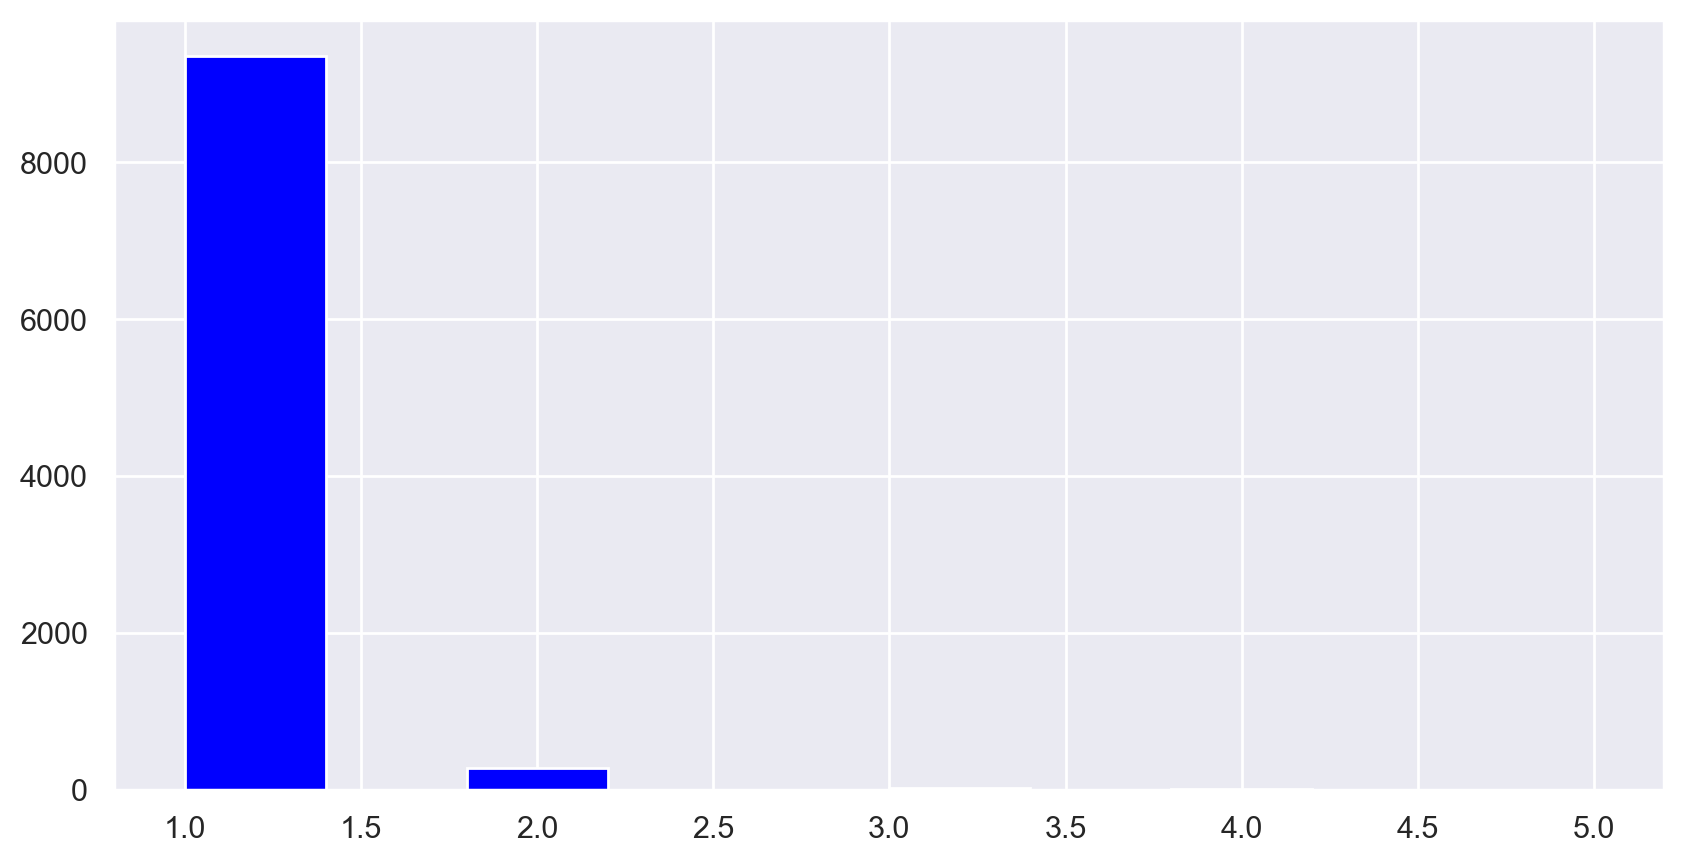

In [32]:
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=10,color='b')

<Axes: >

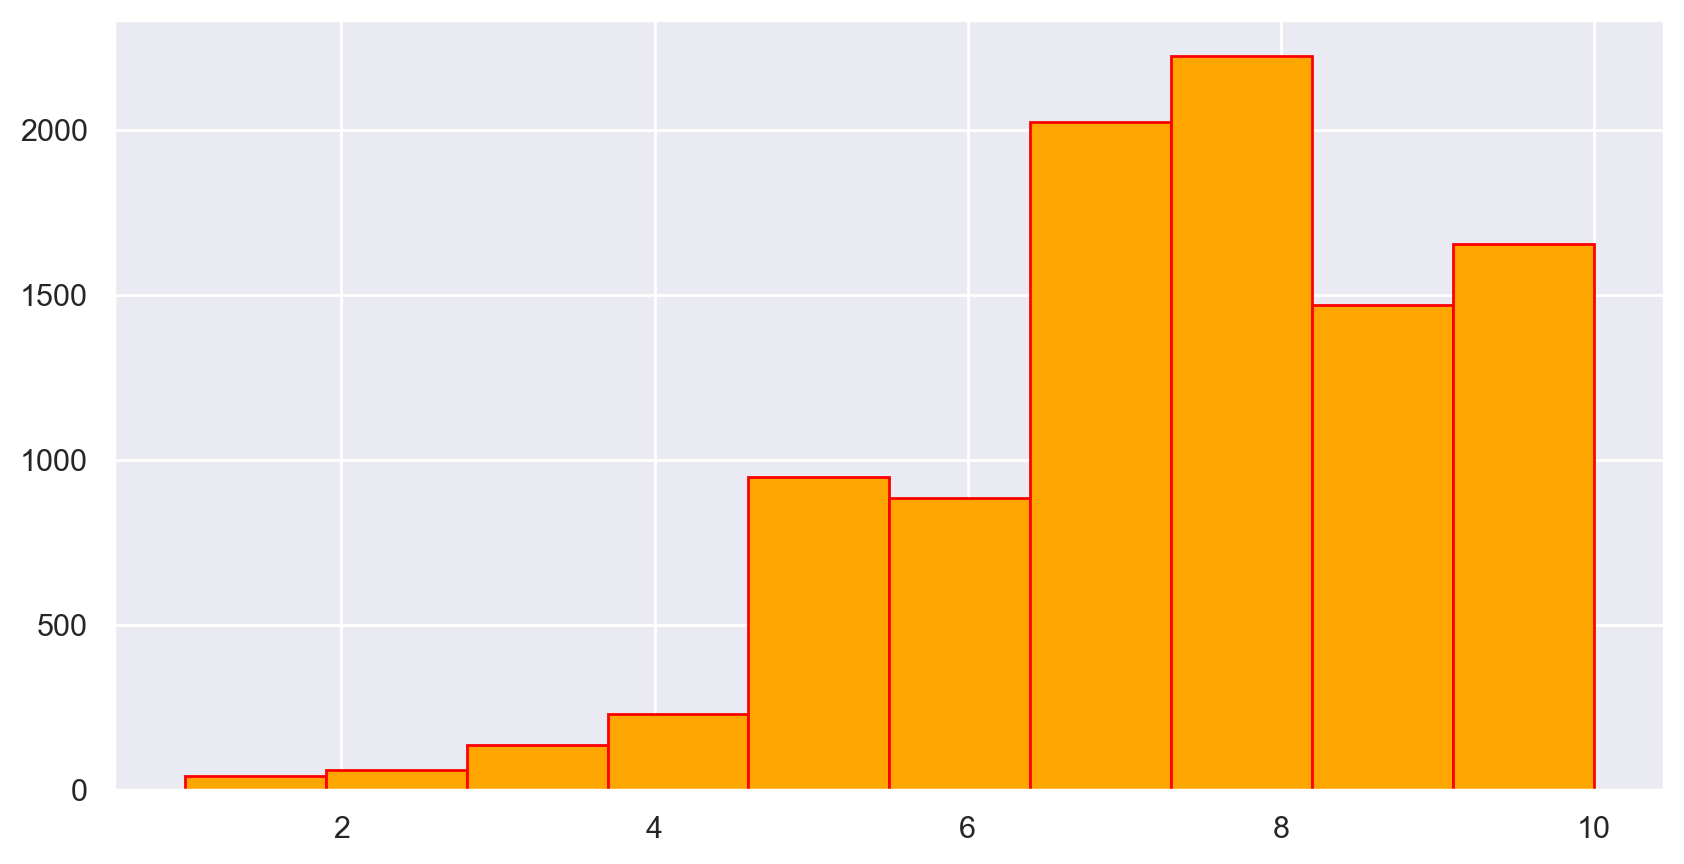

In [33]:
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['book_rating'].hist(bins=10,color='orange',edgecolor='red')

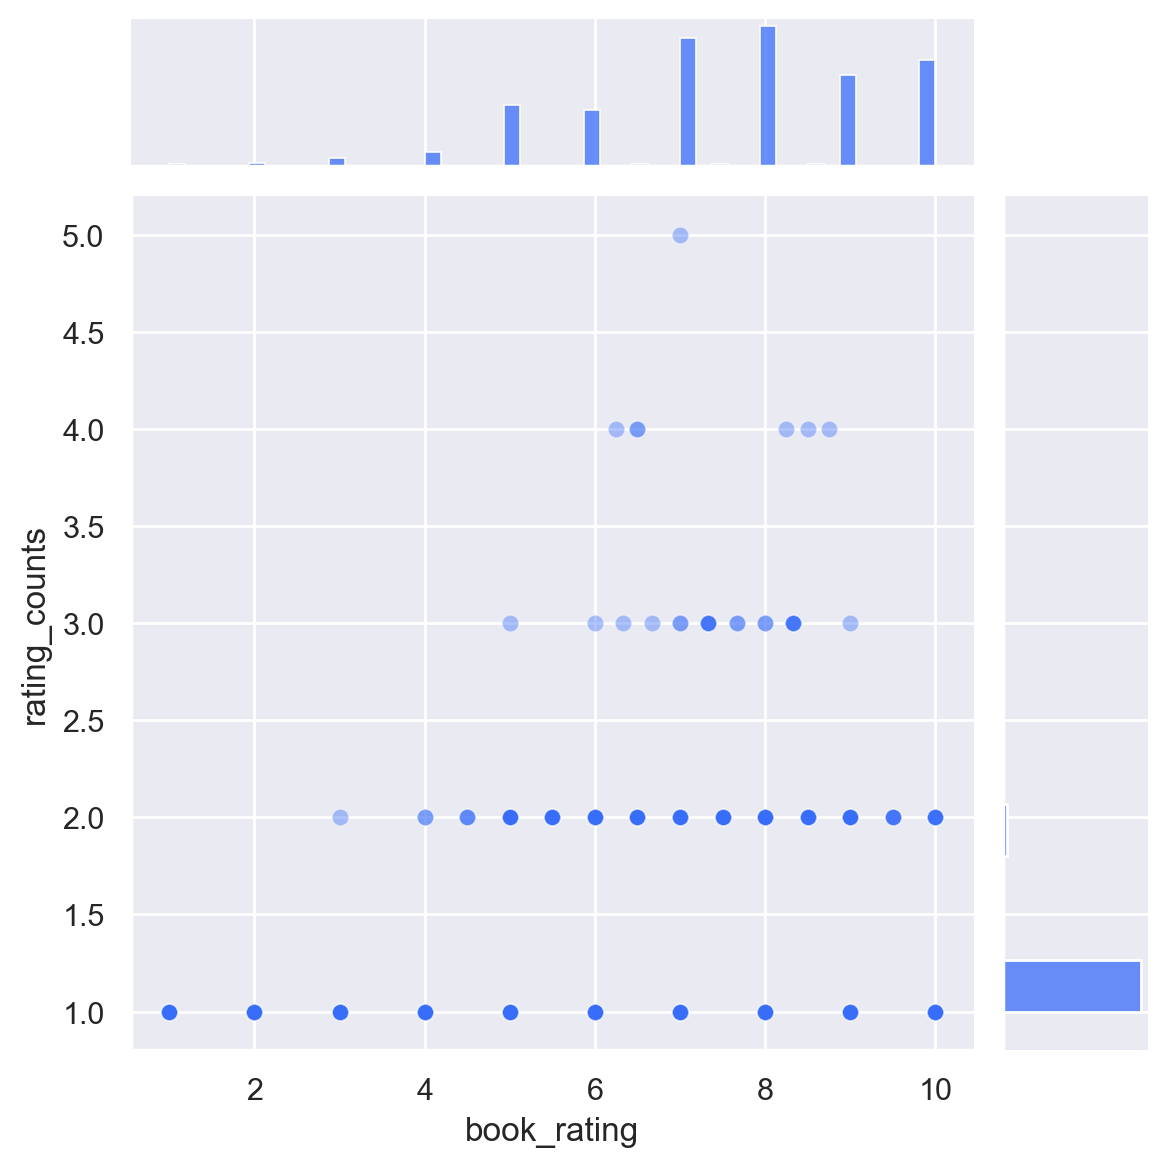

In [34]:
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='book_rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

# You can enter name of your favourite book and get the recommendation on what might like